In [1]:
import numpy as np
from collections import OrderedDict
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib import style
import math 
style.use('ggplot')

In [2]:
def hypothesis(x,w,j):
    h = w[0]
    X=np.ones((len(w), len(x)))
    for i in np.arange(1, len(w)):                
        X[i] = x ** (i)
    X=np.transpose(X)
    h= X@w
    return h

In [3]:
#errors
def error(X, y, w, i, j):
    if(i==0): #mean_square_error
        y1 = hypothesis(X,w,j)
        return sum((y1-y)**2)/(y.size)
    elif i==1: #mean_absolute_error
        y1 = hypothesis(X,w,j)
        return sum(abs(y1-y))/(y.size)
    elif i==2: #log_cosh_loss
        y1 = hypothesis(X,w,j)
        return np.sum(np.log(np.cosh(y1-y)))/(y.size)
    elif i==3: #root_mean_square_error
        y1 = hypothesis(X,w,j)
        return np.sqrt(sum((y1-y)**2)/(y.size))
    elif i==4: #log loss
        y1 = hypothesis(X,w,j)
        return sum(np.log(1/np.abs(y1-y))/(y.size))
    elif i==5: #KLDivergence
        y1 = hypothesis(X,w,j)
        return np.sum(y1 *( np.log(abs(y1))-np.log(abs(y))))/y.size

In [4]:
#gradient functions
def grad(X, y, h, err):
    n=y.size
    if err==0:
        return (2/n)*np.dot(np.transpose(X), h-y)
    elif err==1:
        return (1/n)*np.dot(np.transpose(X),np.sign(h-y))    
    elif err==2:
        return (1/n)*np.dot(np.transpose(X), np.tanh(h-y))
    elif err==3:
        return np.dot(np.transpose(X), h-y)/(np.sqrt(sum((h-y)**2))*n)
    elif err==4:
        return (-1/n)*np.dot((np.transpose(X),np.transpose(np.linalg.pinv(h-y))))
    elif err==5:
        return np.add(np.dot(np.transpose(X),np.log(np.abs(h/y))) , np.dot(np.transpose(X),y))

In [5]:
#basis functions
def basis(x,i):
    if(i==0):
        return x
    elif(i==1):
        #gaussian
        return np.exp(-(x**2)/2)
    elif(i==2):
        #sigmoid
        return 1/(1+np.exp(-x))
    elif(i==3):
        #tanh
        return (1-np.exp(-x))/(1+np.exp(-x))

In [6]:
#noise variance
def noise(x,w,y):
    return error(x, y, w, 0, 0)

In [7]:
def mini_batch_maker(X, y, batch_size):
    mini_batches = []
    data = np.hstack((X, y.reshape(len(y),-1)))
    np.random.shuffle(data)
    i = 0
    for i in range(0, (math.floor(data.shape[0]/batch_size)) ):
        mini_batch = data[i * batch_size:(i + 1)*batch_size , :]
        X_mini = mini_batch[:, :-1]
        Y_mini = mini_batch[:, -1].reshape((-1, 1))
        mini_batches.append((X_mini, Y_mini))
    if data.shape[0] % batch_size != 0:
        mini_batch = data[i * batch_size:data.shape[0]]
        X_mini = mini_batch[:, :-1]
        Y_mini = mini_batch[:, -1].reshape((-1, 1))
        mini_batches.append((X_mini, Y_mini))
    return mini_batches

def gradient_descent(x, y,X_test,Y_test, order=3, batch_size=1, err=1, basis=0, tol = 10**-5, numIters = 1000, learningRate = 0.01):
    n = len(x)
    w = np.zeros((order + 1,1))           
    costs = []
    minicosts= []
    X=np.ones((order+1, len(x)))
    for i in np.arange(1, order+1):                
        X[i] = x ** (i)
    X=np.transpose(X)
    for i in range(numIters):
        mini_batches = mini_batch_maker(X, y, batch_size)
        for mini_batch in mini_batches:
            X_mini, y_mini = mini_batch
            h = hypothesis(X_mini[:,1], w, 0)
            w += -learningRate * grad(X_mini, y_mini, h, err)
            cost =error(X_mini[:,1], y_mini, w, err , 0)
            minicosts.append(cost)

    plt.figure(1)
    plt.scatter(x,y,c='b')
    plt.scatter(X_test,Y_test,c='r')
    func = w[0]
    labelr= []
    labelr.append('%.*f' % (2, w[0]))
    for i in np.arange(1, len(w)):            
        labelr.append(' + ' +'%.*f' % (2, w[i]) + 'x^' + str(i) ) 
    label = ''.join(labelr)
    print(label)
    print('For mini-batch size: '+ str(batch_size))
    func= hypothesis(x,w,0)
    plt.plot(x, func)        
    plt.title('Polynomial Fit: Order ' + str(len(w)-1))
    plt.xlabel('x')
    plt.ylabel('y') 
    
    plt.figure(2)
    plt.plot( minicosts)
    plt.xlabel('Iterations')
    plt.ylabel('cost')
    plt.title('Cost vs Iterations of Gradient Descent')
    
    plt.show()
    return w

In [8]:
def main_f(order,what,size, batch_size=5, numIters = 1000,tol = 10**-5, learningRate = 0.001, err = 0):
    if(err==0):
        print('mean_square_error')
    elif err==1:
        print('mean_absolute_error')
    elif err==2: 
        print('log_cosh_loss')
    elif err==3: 
        print('root_mean_square_error')
    elif err==4: 
        print('log loss')
    elif err==5: 
        print('KLDivergence')
        
    if(what==0):
        print('Calculating w by psuedo_inverse')
    elif what==1:
        print('Calculating w by gradient descent')
        
    print('Polynomial Order:' + str(order))
    
    data_set= pd.read_csv("https://web.iitd.ac.in/~seshan/a1/group09.txt", sep="\s+")
    global X
    global Y
    X = data_set.iloc[:size,0].values
    Y = data_set.iloc[:size,1].values
    X_train = []
    X_test = []
    Y_train = []
    Y_test = []
    for i in range(0,20):
        if i%5 == 0:
            X_test.append(data_set.iloc[i,0])
            Y_test.append(data_set.iloc[i,1])
        else:
            X_train.append(data_set.iloc[i,0])
            Y_train.append(data_set.iloc[i,1])  
    X_train = np.array(X_train)
    Y_train = np.array(Y_train)
    X_test = np.array(X_test)
    Y_test = np.array(Y_test)
    
    if what == 0:
        return perf_on_test(X_train, Y_train, X_test, Y_test,order)     
    else:
        w = gradient_descent(X_train, Y_train, X_test, Y_test, order,batch_size, err, 0, tol, numIters, learningRate)
        cost_train= error(X_train, Y_train, w,err,0)
        print('Training Cost: ' + str(cost_train))
        cost_test= error(X_test, Y_test, w, err,0)
        print('Testing Cost: ' + str(cost_test))
        noisee = noise(X,w,Y)
        print('Noise: ' + str(noisee))

root_mean_square_error
Calculating w by gradient descent
Polynomial Order:1
-0.00 + 0.00x^1
For mini-batch size: 5


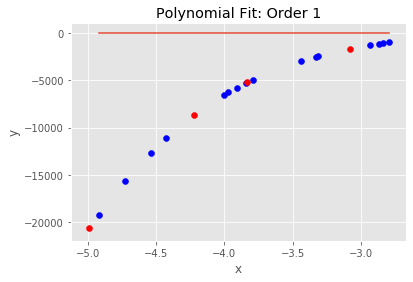

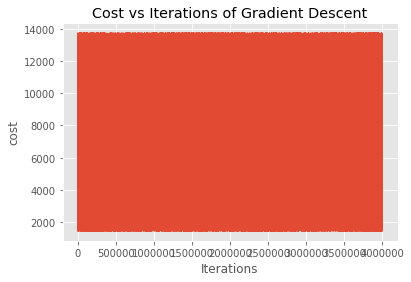

Training Cost: [19220.81769166 15663.50769166 12652.05769166 11133.38769166
  6526.05769166  6273.23769166  5790.44769166  5265.97769166
  4915.04769166  2946.80769166  2480.11769166  2402.40769166
  1251.53769166  1121.27769166  1058.59769166   962.26769166]
Testing Cost: [20683.0575156  8638.1275156  5194.1875156  1635.6975156]
Noise: [4.27788874e+08 3.69439831e+08 2.45345472e+08 1.60074563e+08
 1.23952321e+08 7.46172494e+07 4.25894285e+07 3.93535107e+07
 3.35292841e+07 2.77305207e+07 2.69795854e+07 2.41576935e+07
 8.68367536e+06 6.15098359e+06 5.77156255e+06 2.67550682e+06
 1.56634651e+06 1.25726358e+06 1.12062900e+06 9.25959043e+05]
root_mean_square_error
Calculating w by gradient descent
Polynomial Order:2
-0.00 + 0.00x^1 + -0.00x^2
For mini-batch size: 5


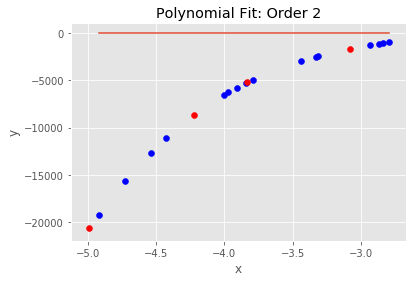

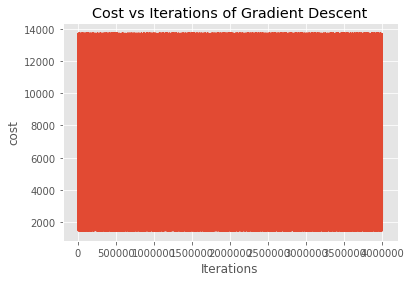

Training Cost: [19220.78205986 15663.47205986 12652.02205986 11133.35205986
  6526.02205986  6273.20205987  5790.41205987  5265.94205987
  4915.01205987  2946.77205988  2480.08205989  2402.37205989
  1251.50205992  1121.24205993  1058.56205993   962.23205994]
Testing Cost: [20683.01599539  8638.0859954   5194.14599541  1635.65599545]
Noise: [4.27787351e+08 3.69438416e+08 2.45344319e+08 1.60073632e+08
 1.23951501e+08 7.46166135e+07 4.25889481e+07 3.93530489e+07
 3.35288578e+07 2.77301330e+07 2.69792030e+07 2.41573316e+07
 8.68345842e+06 6.15080101e+06 5.77138569e+06 2.67538641e+06
 1.56625437e+06 1.25718104e+06 1.12055107e+06 9.25888203e+05]
root_mean_square_error
Calculating w by gradient descent
Polynomial Order:3
-0.00 + 0.00x^1 + -0.00x^2 + 0.01x^3
For mini-batch size: 5


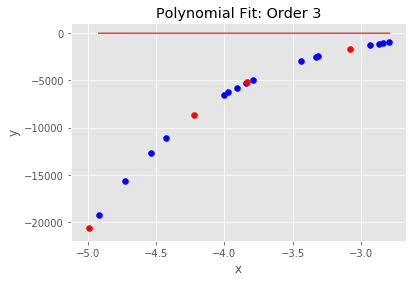

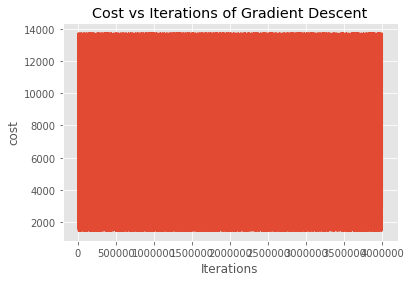

Training Cost: [19220.16918719 15662.85918785 12651.4091887  11132.7391893
  6525.40919284  6272.58919318  5789.79919392  5265.32919488
  4914.39919564  2946.15920322  2479.46920678  2401.75920751
  1250.88922888  1120.62923406  1057.94923701   961.61924229]
Testing Cost: [20682.24888679  8637.31889187  5193.37889765  1634.88892922]
Noise: [4.27760724e+08 3.69413671e+08 2.45324154e+08 1.60057343e+08
 1.23937168e+08 7.46054929e+07 4.25805467e+07 3.93449730e+07
 3.35214035e+07 2.77233539e+07 2.69725164e+07 2.41510044e+07
 8.67966515e+06 6.14760858e+06 5.76829330e+06 2.67328112e+06
 1.56464367e+06 1.25573804e+06 1.11918876e+06 9.24649921e+05]
root_mean_square_error
Calculating w by gradient descent
Polynomial Order:4
-0.00 + 0.00x^1 + -0.00x^2 + 0.01x^3 + -0.05x^4
For mini-batch size: 5


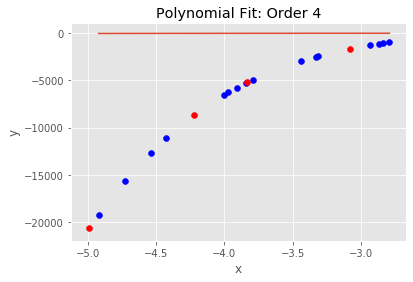

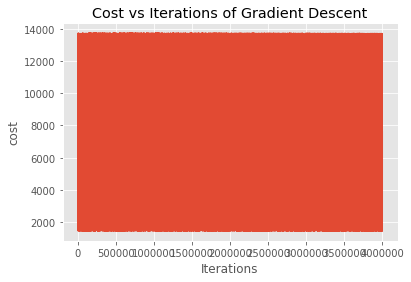

Training Cost: [19209.18173361 15651.87209787 12640.42256648 11121.75289906
  6514.42485685  6261.60504767  5778.81545844  5254.34599021
  4903.41640956  2935.18061984  2468.49260287  2390.78300826
  1239.9249608   1109.6678755   1046.98953648   950.66251613]
Testing Cost: [20667.52647816  8622.59964234  5178.66325297  1620.19310785]
Noise: [4.27275468e+08 3.68962737e+08 2.44956718e+08 1.59760594e+08
 1.23676065e+08 7.44029598e+07 4.24275888e+07 3.91979493e+07
 3.33857120e+07 2.75999730e+07 2.68508206e+07 2.40358606e+07
 8.61072065e+06 6.08961838e+06 5.71212714e+06 2.63511145e+06
 1.53549114e+06 1.22964301e+06 1.09456499e+06 9.02287236e+05]
root_mean_square_error
Calculating w by gradient descent
Polynomial Order:5
-0.00 + 0.00x^1 + -0.00x^2 + 0.01x^3 + -0.05x^4 + 0.21x^5
For mini-batch size: 5


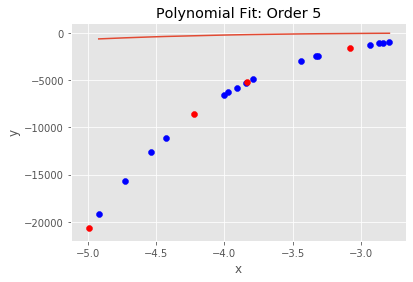

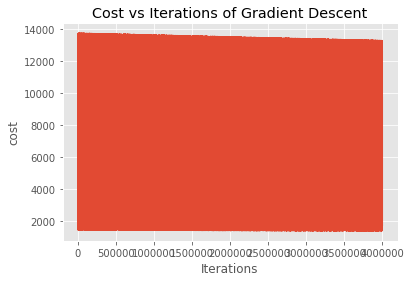

Training Cost: [19005.74091377 15448.62371926 12437.42314099 10918.9311077
  6312.66496172  6059.9501531   5577.38751693  5053.21373123
  4702.51881819  2736.71453991  2271.22093915  2193.75952966
  1050.87717485   922.77290934   861.36069267   767.37884262]
Testing Cost: [20376.75628582  8333.74733926  4892.09584973  1348.30353443]
Noise: [4.18191075e+08 3.60527113e+08 2.38099405e+08 1.54239404e+08
 1.18828681e+08 7.06626758e+07 3.96243907e+07 3.65069227e+07
 3.09088902e+07 2.53558487e+07 2.46385481e+07 2.19474373e+07
 7.39556847e+06 5.08152779e+06 4.73851502e+06 2.00167414e+06
 1.07249840e+06 8.24444196e+05 7.17176109e+05 5.67638167e+05]
root_mean_square_error
Calculating w by gradient descent
Polynomial Order:6
-0.00 + 0.00x^1 + -0.00x^2 + 0.01x^3 + -0.05x^4 + 0.21x^5 + -0.95x^6
For mini-batch size: 5


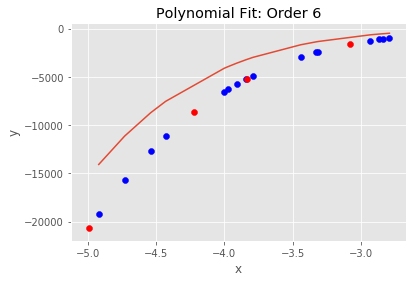

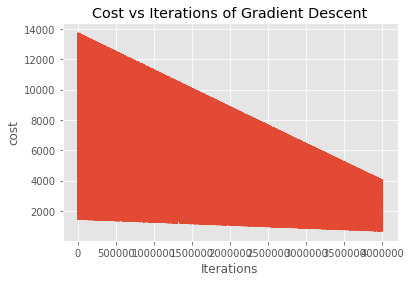

Training Cost: [15617.94077622 12213.01346273  9419.0156032   8069.56532236
  4663.15015848  4538.02731434  4330.16571421  4156.45475818
  4073.9293506   4165.58599248  4320.59386489  4350.73236539
  4920.69243096  4997.81918681  5035.71178796  5094.90110187]
Testing Cost: [15442.25421137  5992.08099485  5597.44915178  7178.00756394]
Noise: [2.79862356e+08 2.34815752e+08 1.43083315e+08 8.52084749e+07
 6.29020318e+07 3.62670935e+07 2.34534106e+07 2.25174725e+07
 2.10853322e+07 2.00578306e+07 1.99599906e+07 1.96775195e+07
 2.21091744e+07 2.38221024e+07 2.41496327e+07 2.80285691e+07
 3.04142282e+07 3.12901598e+07 3.17237441e+07 3.24054172e+07]
root_mean_square_error
Calculating w by gradient descent
Polynomial Order:7
-0.00 + 0.00x^1 + -0.00x^2 + 0.00x^3 + -0.02x^4 + 0.05x^5 + -0.13x^6 + 0.28x^7
For mini-batch size: 5


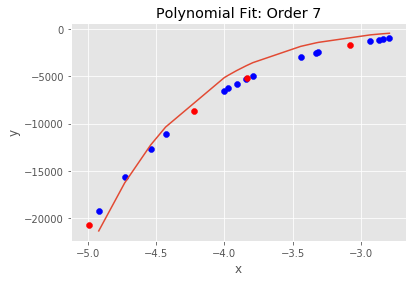

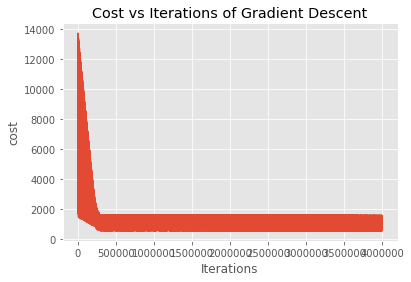

Training Cost: [14959.99321677 11798.10328681  9346.29193501  8251.60882318
  6153.87602738  6118.88232402  6080.76830402  6082.67218022
  6109.14070025  6610.30915378  6807.64459297  6843.04244584
  7442.93880843  7518.92390595  7556.01525001  7613.67292123]
Testing Cost: [14679.96633436  8763.5172579   9512.28836198 11381.6195354 ]
Noise: [2.55835265e+08 2.15678858e+08 1.35843202e+08 8.80396122e+07
 7.08120866e+07 5.25220946e+07 4.67718482e+07 4.66814210e+07
 4.68638846e+07 4.75903782e+07 4.77326269e+07 4.83836891e+07
 5.73977672e+07 6.06714555e+07 6.12588729e+07 6.77019324e+07
 7.13723452e+07 7.26839079e+07 7.33271141e+07 7.43309455e+07]


In [9]:
for i in range(1,8):
    main_f(i,1,20,5,1000000,10**-5, 0.0000000001,3)

root_mean_square_error
Calculating w by gradient descent
Polynomial Order:1
-0.00 + 0.00x^1
For mini-batch size: 3


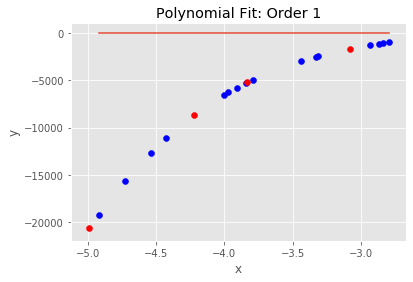

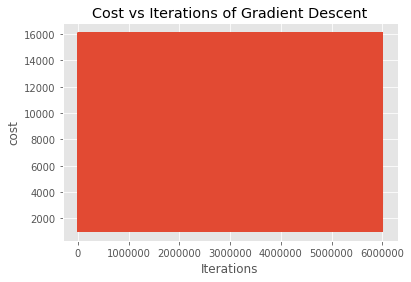

Training Cost: [19220.81539466 15663.50539466 12652.05539466 11133.38539466
  6526.05539466  6273.23539466  5790.44539466  5265.97539466
  4915.04539466  2946.80539466  2480.11539466  2402.40539466
  1251.53539466  1121.27539466  1058.59539466   962.26539466]
Testing Cost: [20683.05504392  8638.12504392  5194.18504392  1635.69504392]
Noise: [4.27788778e+08 3.69439742e+08 2.45345399e+08 1.60074504e+08
 1.23952269e+08 7.46172091e+07 4.25893981e+07 3.93534814e+07
 3.35292571e+07 2.77304961e+07 2.69795612e+07 2.41576705e+07
 8.68366162e+06 6.15097202e+06 5.77155134e+06 2.67549919e+06
 1.56634067e+06 1.25725835e+06 1.12062406e+06 9.25954555e+05]
root_mean_square_error
Calculating w by gradient descent
Polynomial Order:2
-0.00 + 0.00x^1 + -0.00x^2
For mini-batch size: 3


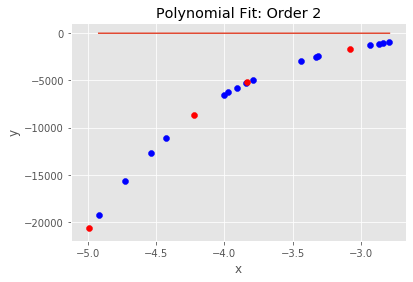

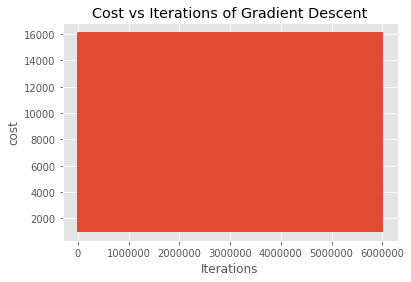

Training Cost: [19220.74590639 15663.4359064  12651.9859064  11133.31590641
  6525.98590643  6273.16590643  5790.37590643  5265.90590644
  4914.97590644  2946.73590649  2480.04590651  2402.33590651
  1251.46590664  1121.20590667  1058.52590668   962.19590671]
Testing Cost: [20682.97407222  8638.04407225  5194.10407228  1635.61407244]
Noise: [4.27785808e+08 3.69436982e+08 2.45343150e+08 1.60072687e+08
 1.23950670e+08 7.46159690e+07 4.25884612e+07 3.93525808e+07
 3.35284257e+07 2.77297401e+07 2.69788155e+07 2.41569649e+07
 8.68323855e+06 6.15061596e+06 5.77120644e+06 2.67526436e+06
 1.56616099e+06 1.25709738e+06 1.12047208e+06 9.25816408e+05]
root_mean_square_error
Calculating w by gradient descent
Polynomial Order:3
-0.00 + 0.00x^1 + -0.00x^2 + 0.02x^3
For mini-batch size: 3


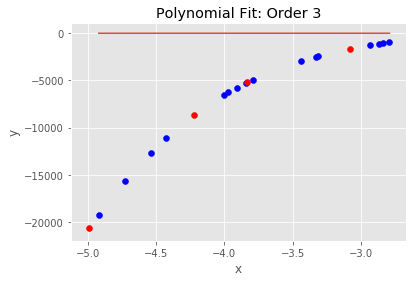

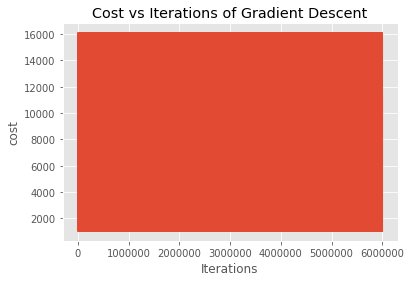

Training Cost: [19219.57304458 15662.263047   12650.81305011 11132.14305232
  6524.81306529  6271.99306656  5789.20306928  5264.7330728
  4913.80307557  2945.56310339  2478.87311647  2401.16311914
  1250.29319756  1120.03321659  1057.35322742   961.02324681]
Testing Cost: [20681.50604764  8636.57606627  5192.63608748  1634.14620334]
Noise: [4.27734851e+08 3.69389628e+08 2.45304560e+08 1.60041517e+08
 1.23923242e+08 7.45946884e+07 4.25723843e+07 3.93371269e+07
 3.35141613e+07 2.77167679e+07 2.69660201e+07 2.41448573e+07
 8.67598033e+06 6.14450757e+06 5.76528951e+06 2.67123647e+06
 1.56307959e+06 1.25433691e+06 1.11786605e+06 9.23447715e+05]
root_mean_square_error
Calculating w by gradient descent
Polynomial Order:4
-0.00 + 0.00x^1 + -0.00x^2 + 0.02x^3 + -0.09x^4
For mini-batch size: 3


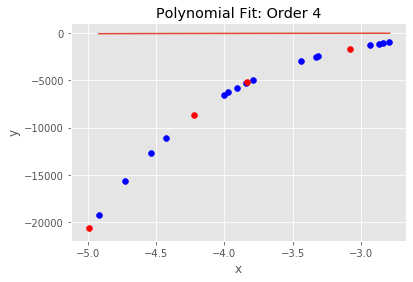

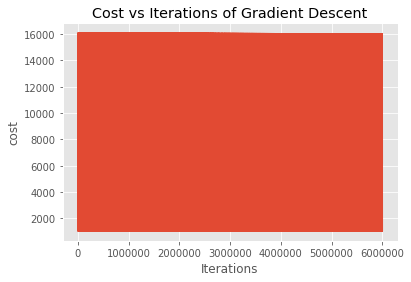

Training Cost: [19198.90208293 15641.59337602 12630.14504002 11111.47622129
  6504.15318038  6251.33385914  5768.5453206   5244.07721316
  4893.14870606  2924.92371821  2458.24080351  2380.53225311
  1229.70517004  1099.45568762  1036.78169037   940.46247544]
Testing Cost: [20653.80860322  8608.88984671  5164.96270211  1606.54388253]
Noise: [4.26822182e+08 3.68541539e+08 2.44613579e+08 1.59483536e+08
 1.23432333e+08 7.42139817e+07 4.22849568e+07 3.90608651e+07
 3.32592218e+07 2.74849915e+07 2.67374143e+07 2.39285797e+07
 8.54662966e+06 6.03576817e+06 5.65998216e+06 2.59979071e+06
 1.50860019e+06 1.20561042e+06 1.07190781e+06 8.81743868e+05]
root_mean_square_error
Calculating w by gradient descent
Polynomial Order:5
-0.00 + 0.00x^1 + -0.00x^2 + 0.02x^3 + -0.09x^4 + 0.39x^5
For mini-batch size: 3


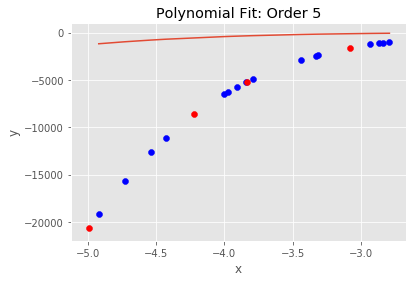

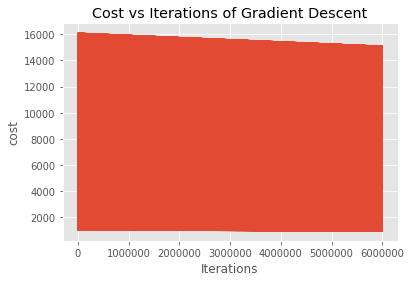

Training Cost: [18823.03982759 15266.40809008 12255.83999521 10737.80234361
  6134.30647411  5881.87064163  5399.91411786  4876.53641052
  4526.47847984  2567.54588315  2105.61031142  2028.90333894
   912.96967163   792.98050696   736.48748714   651.87462189]
Testing Cost: [20116.83218509  8078.81484193  4643.44701755  1149.05203953]
Noise: [4.10124640e+08 3.53046935e+08 2.32045464e+08 1.49392847e+08
 1.14591006e+08 6.74254276e+07 3.72339369e+07 3.42178323e+07
 2.88133654e+07 2.34706002e+07 2.27820824e+07 2.02028875e+07
 6.44014723e+06 4.31321707e+06 4.00136065e+06 1.57191764e+06
 7.96763577e+05 6.00934651e+05 5.18796923e+05 4.07880671e+05]
root_mean_square_error
Calculating w by gradient descent
Polynomial Order:6
-0.00 + 0.00x^1 + -0.00x^2 + 0.02x^3 + -0.07x^4 + 0.32x^5 + -1.36x^6
For mini-batch size: 3


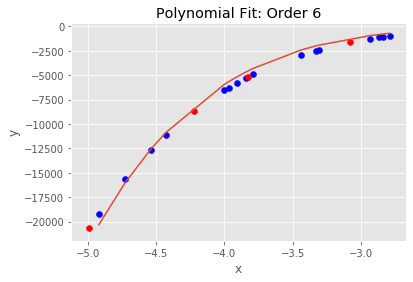

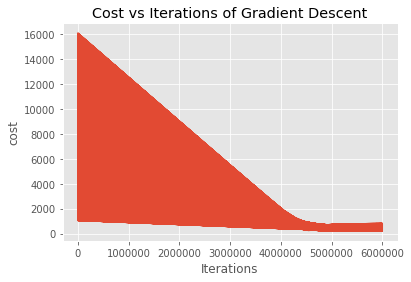

Training Cost: [14467.74622987 11294.65265217  8840.13333229  7752.71967265
  5795.64912144  5776.09873826  5769.44057504  5807.85792106
  5859.69442775  6503.29426321  6731.70388762  6772.11280355
  7440.21386694  7523.18911797  7563.59117829  7626.27027118]
Testing Cost: [14100.33869545  7941.10262993  8808.35923284 10840.4108586 ]
Noise: [2.39969946e+08 2.00825386e+08 1.23451331e+08 7.77316170e+07
 6.15549867e+07 4.49916746e+07 4.07029468e+07 4.07874670e+07
 4.13040135e+07 4.23934319e+07 4.25853581e+07 4.34295807e+07
 5.38056493e+07 5.74022796e+07 5.80434710e+07 6.50170816e+07
 6.89533270e+07 7.03550274e+07 7.10416072e+07 7.21120974e+07]
root_mean_square_error
Calculating w by gradient descent
Polynomial Order:7
-0.00 + 0.00x^1 + -0.00x^2 + 0.01x^3 + -0.03x^4 + 0.08x^5 + -0.20x^6 + 0.26x^7
For mini-batch size: 3


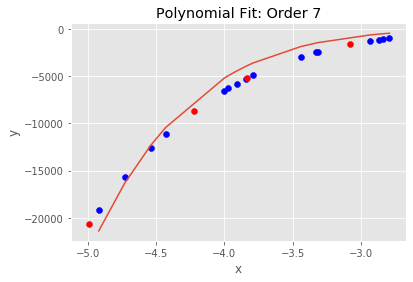

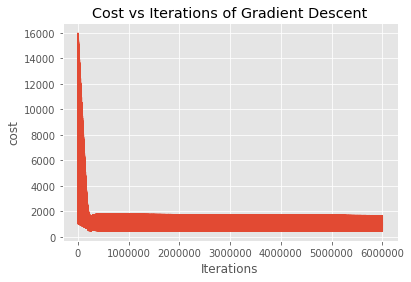

Training Cost: [14917.07594093 11759.2690585   9313.93431808  8224.4817879
  6156.22465823  6123.37691258  6089.3867621   6095.73274646
  6125.10425231  6640.38967714  6840.38113374  6876.19409243
  7481.37813646  7557.8668337   7595.19417898  7653.2066986 ]
Testing Cost: [14634.47086174  8757.87889595  9525.64543346 11408.78526904]
Noise: [2.54421916e+08 2.14416312e+08 1.34947525e+08 8.74545094e+07
 7.03836059e+07 5.23509528e+07 4.68185265e+07 4.67541729e+07
 4.69864271e+07 4.77670099e+07 4.79166624e+07 4.85965126e+07
 5.78135774e+07 6.11353960e+07 6.17308276e+07 6.82529588e+07
 7.19629905e+07 7.32879870e+07 7.39376574e+07 7.49514234e+07]


In [10]:
for i in range(1,8):
    main_f(i,1,20,3,1000000,10**-5, 0.0000000001,3)

root_mean_square_error
Calculating w by gradient descent
Polynomial Order:1
-0.00 + 0.01x^1
For mini-batch size: 1


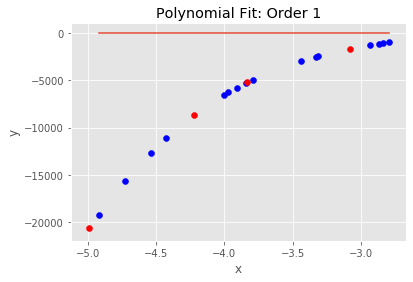

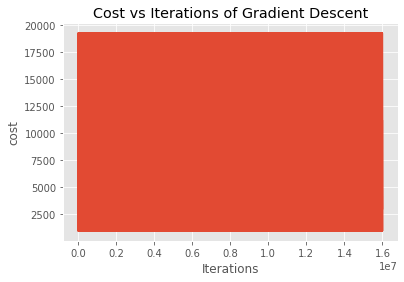

Training Cost: [19220.79616919 15663.48616919 12652.03616919 11133.36616919
  6526.03616919  6273.21616919  5790.42616919  5265.95616919
  4915.02616919  2946.78616919  2480.09616919  2402.38616919
  1251.5161692   1121.2561692   1058.5761692    962.2461692 ]
Testing Cost: [20683.03436508  8638.10436508  5194.16436508  1635.67436509]
Noise: [4.27787970e+08 3.69438992e+08 2.45344788e+08 1.60074010e+08
 1.23951834e+08 7.46168720e+07 4.25891434e+07 3.93532366e+07
 3.35290310e+07 2.77302906e+07 2.69793584e+07 2.41574787e+07
 8.68354660e+06 6.15087522e+06 5.77145757e+06 2.67543535e+06
 1.56629182e+06 1.25721459e+06 1.12058274e+06 9.25916996e+05]
root_mean_square_error
Calculating w by gradient descent
Polynomial Order:2
-0.00 + 0.01x^1 + -0.02x^2
For mini-batch size: 1


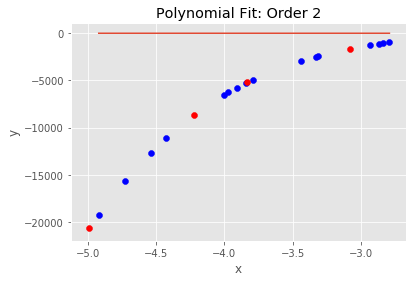

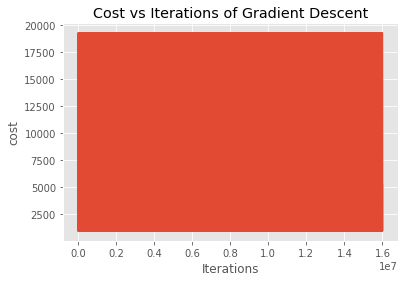

Training Cost: [19220.46690993 15663.15691002 12651.70691013 11133.03691021
  6525.70691067  6272.88691072  5790.09691082  5265.62691094
  4914.69691104  2946.45691204  2479.76691251  2402.0569126
  1251.18691541  1120.92691609  1058.24691647   961.91691717]
Testing Cost: [20682.65069333  8637.72069392  5193.78069459  1635.29069825]
Noise: [4.27773900e+08 3.69425916e+08 2.45334132e+08 1.60065403e+08
 1.23944261e+08 7.46109957e+07 4.25847039e+07 3.93489691e+07
 3.35250920e+07 2.77267084e+07 2.69758251e+07 2.41541352e+07
 8.68154208e+06 6.14918818e+06 5.76982340e+06 2.67432276e+06
 1.56544056e+06 1.25645195e+06 1.11986274e+06 9.25262526e+05]
root_mean_square_error
Calculating w by gradient descent
Polynomial Order:3


In [ ]:
for i in range(1,8):
    main_f(i,1,20,1,1000000,10**-5, 0.0000000001,3)